# Numpy

NumPy is a fundamental package for scientific computing with Python. It contains, among the other things:

  * a powerful N-dimensional array object
  * sophisticated operations on arrays
  * tools for integrating C/C++ and Fortran code (not covered in the course)
  * (pseudo-)random number generation
  * linear algebra, Fourier transform, ... (in the next lectures)

NumPy can be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined and this allows NumPy to seamlessly and speedily integrate with a wide variety of projects.

Link to the [NumPy documentation](https://numpy.org/doc/stable/user/whatisnumpy.html).

In [2]:
import numpy as np # import naming convention

## Arrays

Numpy arrays differ from the python lists, because Numpy provides:
* full support for multi-dimensional arrays
* closer to hardware implementation (efficiency)
* designed for scientific computation (convenience)

Similary to other programming languages that have a specific focus (e.g. "object-oriented"), arrays in numpy are so central that developing scientific applications can be considered as "array-oriented".

A demonstration of the Numpy efficiency:

In [3]:
# standard python
L = range(1000)
%timeit [i**2 for i in L]

# numpy
a = np.arange(1000)
%timeit a**2

102 µs ± 15.1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.27 µs ± 838 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


A Numpy array is a grid of **omogeneous** values (all of the same type), and is indexed by a tuple of non-negative integers.

All standard data types are available ([documentation](https://numpy.org/doc/stable/user/basics.types.html)):

In [4]:
# The type should specified when the array is created
a = np.array([1, 2, 3], dtype=float)
print(a, a.dtype, '\n')
a = np.array([1, 2, 3], 'uint32')
print(a, a.dtype, '\n')

# Alternatively, we can let python to infer the type: 
a = np.array([1, 2, 3.3])
print(a, a.dtype, '\n')

# Also complex numbers are allowed
a = np.array([1+2j, 3+4j, 5+6*1j])
print (a, a.dtype, '\n')

# Booleans
a = np.array([True, False, False, True])
print(a, a.dtype, '\n')

# Non-numerical types are also allowed: strings
a = np.array(['bonjour messieurs dames', 'Hello', 'Hallo'])
print(a, a.dtype, '\n')


[1. 2. 3.] float64 

[1 2 3] uint32 

[1.  2.  3.3] float64 

[1.+2.j 3.+4.j 5.+6.j] complex128 

[ True False False  True] bool 

['bonjour messieurs dames' 'Hello' 'Hallo'] <U23 



### Copies and views

Being **mutable objects**, numpy arrays can have **copies** and **views**:

In [5]:
a = np.array([1, 2, 3])
b = a # this is a view

c = a.copy() # this is a copy


# The changes applied to array a modify also the array b (which, as a matter of fact, are the same PyObject)
a[0] = 7
print("array:", a, "view:", b, "copy:", c)

# ... and viceversa
b[1] = 7
print("array:", a, "view:", b, "copy:", c)

# changes on c do not modify array a
c[0] = 9
print("array:", a, "view:", b, "copy:", c)

# The python object is the same for a and b, but different for c:
print("Are a and b the same object?", np.may_share_memory(a, b))
print("Are a and c the same object?", np.may_share_memory(a, c))

array: [7 2 3] view: [7 2 3] copy: [1 2 3]
array: [7 7 3] view: [7 7 3] copy: [1 2 3]
array: [7 7 3] view: [7 7 3] copy: [9 2 3]
Are a and b the same object? True
Are a and c the same object? False


Please remember that, with numpy objects, the `id()` function does not always work. To check whether two variables point to the same PyObject, use `np.may_share_memory()`.

### Dimensions

The number of dimensions is called the **rank** of the array.
The **shape** of an array is a tuple of integers giving the size of the array along each dimension.

- 1D arrays:

In [6]:
a1 = np.array([0, 1, 2, 3])
print("array: \n", a1)
print("rank:", a1.ndim)
print("shape:", a1.shape)
print("size of the first dimension (axis):", len(a1)) # not recommended in >1D

array: 
 [0 1 2 3]
rank: 1
shape: (4,)
size of the first dimension (axis): 4


 - 2D arrays:

In [15]:
a2_3 = np.array([[0, 1, 2], [3, 4, 5]])
print("2 x 3 array: \n", a2_3)
print("rank:", a2_3.ndim)
print("shape:", a2_3.shape)
print("size of the first dimension (axis):", len(a2_3))

2 x 3 array: 
 [[0 1 2]
 [3 4 5]]
rank: 2
shape: (2, 3)
size of the first dimension (axis): 2


- 3D arrays:

In [12]:
a2_3_4 = np.array([[[1, 10, 100, 1000], [2, 20, 200, 2000], [3, 30, 300, 3000]], \
                   [[4, 40, 400, 4000], [5, 50, 500, 5000], [6, 60, 600, 6000]]])
print("2 x 3 x 4 array:\n", a2_3_4)
print("rank:", a2_3_4.ndim)
print("shape:", a2_3_4.shape)
print("size of the first dimension (axis):", len(a2_3_4))

2 x 3 x 4 array:
 [[[   1   10  100 1000]
  [   2   20  200 2000]
  [   3   30  300 3000]]

 [[   4   40  400 4000]
  [   5   50  500 5000]
  [   6   60  600 6000]]]
rank: 3
shape: (2, 3, 4)
size of the first dimension (axis): 2


### Array initialization

Arrays can be created from lists, but also lists can be obtained by arrays (however, remember that the two are not equivalent because a Numpy array is **not** a list):

In [16]:
l = [0, 1, 2, 3]
a = np.array(l)
print(a.tolist(), ":", type(a), "->", type(a.tolist()))

[0, 1, 2, 3] : <class 'numpy.ndarray'> -> <class 'list'>


Initialization by using the Numpy `arange` and `linspace` methods:

In [17]:
# evenly spaced:
print(np.arange(1, 9, 2)) # same as "range": start, end (exclusive), step

# or by number of points:
print(np.linspace(0, 1, 11)) # start, end, num-points (convenient to plot a function, for example)

[1 3 5 7]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


Initialization of the most common 2D arrays (matrices):

In [18]:
# 3x3 matrix of 1's
ones = np.ones((3, 3))
print(ones, '\n')

# 2x2 matrix of 0's
zeros = np.zeros((2, 2))
print(zeros, '\n')

# 3x3 unitary matrix
unity3d = np.eye(3)
#unity3d = np.identity(3) # np.identity calls np.eye, so the two are equivalent
print(unity3d, '\n')

# generic diagonal matrix
diagonal = np.diag(np.array([1, 20, 3, 4]))
print(diagonal, '\n')

# from list comprehensions
array = np.array([(i, j) for i in range(2) for j in range(3)])
print(array, '\n')

# from a function
fromfunct = np.fromfunction(lambda i, j: (i - 2)**2 + (j - i)**2, (5, 5))
print(fromfunct, '\n')

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

[[0. 0.]
 [0. 0.]] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

[[ 1  0  0  0]
 [ 0 20  0  0]
 [ 0  0  3  0]
 [ 0  0  0  4]] 

[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]] 

[[ 4.  5.  8. 13. 20.]
 [ 2.  1.  2.  5. 10.]
 [ 4.  1.  0.  1.  4.]
 [10.  5.  2.  1.  2.]
 [20. 13.  8.  5.  4.]] 



### Initialization with random numbers

Numpy includes `numpy.random` module, which provides a basic but effective way to generate (pseudo) random numbers.

For more complex tasks related to Monte Carlo techniques, such as generating random numbers according to non-trivial PDFs, there is the `scipy.stats` module, which will be used later in the course.

In [19]:
import numpy.random as npr
npr.seed(123) # fixing the seed allows to reproduce the pseudo random number sequence

# random values from a uniform distrubtion in [0.0, 1.0) for a given shape
print("uniform:", '\n', npr.rand(3, 4), '\n') # shape=(3, 4)
 
# random values from a standard normal distrubtion  for a given shape
print("normal:", '\n', npr.randn(2, 5), '\n') # shape=(2, 5)

# random integers between "low" and "high" ends for a given shape (size)
print("integers:", '\n', npr.randint(1, 5, size=(3, 6)), '\n') # shape=(3, 6)

uniform: 
 [[0.69646919 0.28613933 0.22685145 0.55131477]
 [0.71946897 0.42310646 0.9807642  0.68482974]
 [0.4809319  0.39211752 0.34317802 0.72904971]] 

normal: 
 [[-0.67888615 -0.09470897  1.49138963 -0.638902   -0.44398196]
 [-0.43435128  2.20593008  2.18678609  1.0040539   0.3861864 ]] 

integers: 
 [[2 4 1 1 1 3]
 [2 2 3 3 4 3]
 [2 1 1 4 3 2]] 



You can check the `numpy.random` [documentation](https://numpy.org/doc/stable/reference/random/index.html?module-numpy.random) to look for the available functions.

### Reshaping and Concatenation

An initial 1D array can be reshaped to a multi-dimensional array:

In [20]:
a = np.arange(0, 6)
m = a.reshape(3, 2) # if the parameters of the reshaping are not appropriate, reshaping fails
print("original:", a, '\n')
print("reshaped:", m, '\n')
# Exercise: check if np.array.reshape returns a view or a copy

a_from_m = m.flatten() # flatten does the opposite
print("flattened array (back to original):", a_from_m, '\n')

original: [0 1 2 3 4 5] 

reshaped: [[0 1]
 [2 3]
 [4 5]] 

flattened array (back to original): [0 1 2 3 4 5] 



The operation of concatenating two arrays is trivial in 1D, much less so in nD:

In [21]:
# 1D concatenation
a = np.array([1, 2])
b = np.array([3, 4, 5, 6])
c = np.array([7, 8, 9])
print("1D concatenation:", np.concatenate((a, b, c)),'\n')

# nD concatenation
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
# if no axis is specified, concatenations occurs on the 1st dimension
print("default 2D concatenation:",'\n', np.concatenate((a, b)),'\n')

print("concatenation along the first axis:",'\n', np.concatenate((a, b), axis=0), '\n')
print("concatenation along the second axis:",'\n', np.concatenate((a, b), axis=1), '\n')

1D concatenation: [1 2 3 4 5 6 7 8 9] 

default 2D concatenation: 
 [[1 2]
 [3 4]
 [5 6]
 [7 8]] 

concatenation along the first axis: 
 [[1 2]
 [3 4]
 [5 6]
 [7 8]] 

concatenation along the second axis: 
 [[1 2 5 6]
 [3 4 7 8]] 



### Indexing an Numpy array: Slicing

The items of an array can be accessed and assigned to the same way as other Python sequences (e.g. lists):

In [22]:
a = np.arange(10)
print(a[0], a[2], a[-1])

# if the rank is > 1, a tuple can be used as index
b = a.reshape(5, 2)
print("b[(1, 1)] :", b[(1, 1)])
# equivalent, but not the same
print("b[1][1] :", b[1][1])

# reminder: the [start:stop:step] works as well. 
# step can be negative and a reverse sequence is thus obtained
print("a[2:9:3] :", a[2:9:3])
print("a[::-1] :", a[::-1])

0 2 9
b[(1, 1)] : 3
b[1][1] : 3
a[2:9:3] : [2 5 8]
a[::-1] : [9 8 7 6 5 4 3 2 1 0]


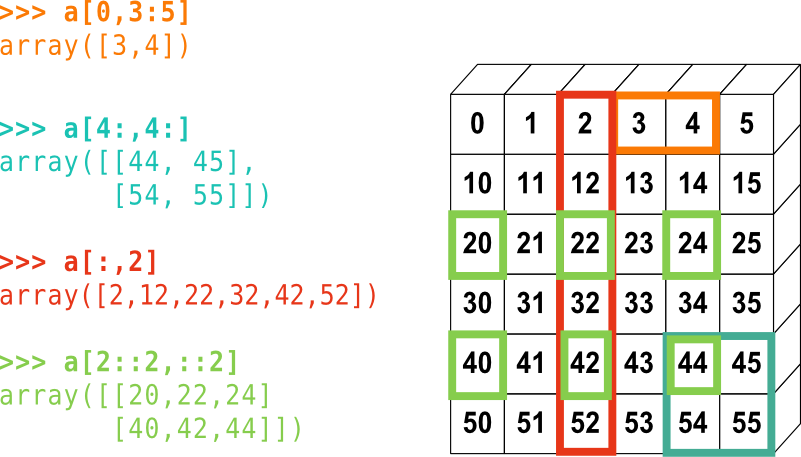

In [23]:
from IPython.display import Image
Image("images/numpy_indexing.png")

In [ ]:
# Exercise: create here the np array used as example above

For multidimensional arrays, indexes are tuples of integers.

Remember that:
* in 2D, the first dimension corresponds to rows, the second to columns.
* for a multidimensional array `a`, `a[0]` is interpreted by taking all elements in the unspecified dimensions.

##### Slicing: view or copy?

A slicing operation creates a **view** on the original array, which is just a way of accessing array data.
When modifying a view, the original array is modified as well.

In [24]:
a = np.diag(np.arange(3))
print(a, '\n')
print(a[1, 1], '\n')
print(a[2], '\n')

# slice the original array, creating a view
b = a[1:, 1:]
print("slice:\n", b, '\n')

# modifying the view also modifies the original array
b[-1, -1] = 10
print(a, '\n')

# check if b is actually a view of a
print("are a and b the same object?", np.may_share_memory(a, b))

[[0 0 0]
 [0 1 0]
 [0 0 2]] 

1 

[0 0 2] 

slice:
 [[1 0]
 [0 2]] 

[[ 0  0  0]
 [ 0  1  0]
 [ 0  0 10]] 

are a and b the same object? True


### Fancy indexing

NumPy arrays can be indexed with slices, but also with *another boolean or integer array* (**masks**).

This method is called *fancy indexing*, and it creates **copies**, not views.

In [34]:
a = np.random.randint(0, 21, 15) # 15 random int between 0 and 21
print("original array:", a, '\n')

# create a mask to filter multiples of 3
mask = (a % 3 == 0)
print("the mask:", mask, '\n')

filtered_a = a[mask]
# equivalent to a[a % 3 == 0]
print("the filtered array:", filtered_a, '\n')

# verify that fancy indexing creates copies
print("are a and filtered_a the same object?", np.may_share_memory(a, filtered_a), '\n')

# Indexing with a mask can be very useful to assign a new value to a sub-array
a[a % 3 == 0] = -1
print("the modified array:", a, '\n')

original array: [10  3 13 14  3  3 14 16  4  4  5 16  9  2  5] 

the mask: [False  True False False  True  True False False False False False False
  True False False] 

the filtered array: [3 3 3 9] 

are a and filtered_a the same object? False 

the modified array: [10 -1 13 14 -1 -1 14 16  4  4  5 16 -1  2  5] 



Indexing can be done with an array of integers, where the same index can be repeated several times.

In [35]:
a = np.arange(0, 100, 10)
l = [2, 3, 2, 4, 2] # l is a python list
print("selection of indexes: ", a[l], '\n') # a[l] also returns a copy

selection of indexes:  [20 30 20 40 20] 



When a new array is created by indexing with an array of integers, the new array has the *same shape as the array use for indexing*:

In [36]:
a = np.arange(0, 20, 2)
print("a :\n", a)
idx = np.array([[3, 4], [9, 7]]) # note the shape and the ordering
print("a[idx] :\n", a[idx])

a :
 [ 0  2  4  6  8 10 12 14 16 18]
a[idx] :
 [[ 6  8]
 [18 14]]


In [ ]:
# an exstensive example
from IPython.display import Image
Image("images/numpy_fancy_indexing.png")

## Operations with arrays

### Basic operations

By default, all operations (additions, subtractions, multiplications, ...) with arrays are performed **element-wise**:

In [ ]:
# operations with scalars
a = np.arange(4)
print(a, '\n')
print(a * 5, '\n')
print(2**a, '\n')

In [ ]:
# operations among 1D arrays. Also in this case, all operations are element-wise
a = np.arange(4)
b = np.ones(4) + 1
print(a, b)
print("a - b:", a - b)
print("a * b:", a * b)

Be careful that, since operations are element-wise in all dimensions, array multiplication is not matrix multiplication:

In [ ]:
ones = np.ones((3,3))

print("the original matrix:", '\n', ones, '\n')

print("the '*' product: ", '\n', ones*ones, '\n')

print("the proper matrix product:", '\n', ones.dot(ones), '\n')

### Other operations

- array comparisons:

In [ ]:
# element-wise
print('equal?:', np.array([1, 3, 2, 5]) == np.array([3, 1, 2, 5]))
print('greater than?:', np.array([1, 3, 2, 5]) > np.array([3, 1, 2, 1]))

# array-wise
print("Equal?:", np.array_equal(np.array([1, 3, 2, 5]), np.array([3, 5, 2, 1]))) # order matters

- logical operations:

In [ ]:
# logical
a = np.array([1, 1, 0, 0], bool)
b = np.array([1, 0, 1, 0], bool)
print("logical OR:", np.logical_or(a, b))
print("logical AND:", np.logical_and(a, b))

- application of functions on arrays:

In [ ]:
# mathematical functions re-implemented in numpy
a = np.arange(1, 9)
print("sin:", np.sin(a))
print("log:", np.log(a))

# works all dimensions
m = a.reshape(2, 4)
print("exp:", np.exp(m))

- matrices:

In [ ]:
# extracting off-diagonal terms
a = np.arange(16).reshape(4,4)
print(a)

a = np.tril(a, +0) # play with the last parameter (sign and value)
#a= np.triu(a, -1) # play with the last parameter (sign and value)
print("a:", '\n', a , '\n')

print("transpose:", '\n', a.T , '\n') # a.T is a view

N.B.: a linear algebra package exists in numpy and is called `numpy.linalg`. However, in terms of performance, the package included in `scipy`, also called `scipy.linalg`, is better and more efficient.

### Reductions

Operations that reduce the dimensionality of arrays are called **reductions**. The reduction functions operate on the elements of an array and return a (set of) scalar(s), and are available either as methods of the array class or as numpy functions.

In dimensions higher than one, the axis has to be specified.

In [ ]:
a = np.arange(1,7)
print(a)
print("sum:", a.sum(), np.sum(a)) # a.sum() and np.sum(a) are equivalent
print("min:", a.min(), np.min(a))
print("max:", a.max(), np.max(a))
print("index of the minimum argument:", a.argmin(), np.argmin(a))
print("index of the maximum argument:", a.argmax(), np.argmax(a))
print("mean:", a.mean(), np.mean(a))
print("median:", np.median(a)) # median is not a method of the array class...
print("standard deviation:", a.std(), np.std(a))
# and many others...

In [ ]:
# these functions work in higher dimensions, too

m = a.reshape(3,2)
print(m, '\n')

print("sum along the columns:", m.sum(axis=0))
print("sum along the rows:", m.sum(axis=1))

### Broadcasting

We have seen element-wise operations on arrays, which work only on arrays of the same rank and shape.
Nevertheless, it’s also possible to do operations on arrays of different sizes if NumPy can transform (**broadcast**) these arrays so that they all have the same size.

In [ ]:
from IPython.display import Image
Image("images/numpy_broadcasting.png")

In [ ]:
a = np.tile(np.arange(0, 40, 10), (3, 1)).T # check what exactly np.tile does on the documentation
print("original array:", '\n', a, '\n')
print("broadcasted sum:", '\n', a + np.arange(3), '\n')

Or, alternatively:

In [ ]:
a = np.array([[0], [10], [20], [30]])
b = np.array([0, 1, 2])
print("original arrays:", '\na =', a, '\nb =', b, '\n')
print("broadcasted sum:", '\n', a + b, '\n')

### More on shape manipulation: adding dimensions

In [ ]:
# adding a dimension (useful for linear algebra and machine learning applications)
a = np.arange(1, 4)
print("new dim along axis 0:", '\n', a[np.newaxis,:], '\n')
print("new dim along axis 1:", '\n', a[:,np.newaxis], '\n')

# resizing (by repeating the content)
print("resizing:", '\n', np.resize(a, (10,)), '\n')